In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

$$
r_t = \frac{S_t-S_{t-1}}{S_{t-1}}
$$

In [2]:
def r(ticker):
    df = yf.Ticker(ticker).history(period='max')
    df[ticker] = df.Close.pct_change()
    return df[[ticker]].iloc[1:] 

In [3]:
FB = r("FB")
SPY = r('SPY')
df = FB.join(SPY, how='inner')
df.head()

,FB,SPY
Date,,
2012-05-21,-0.109861,0.017188
2012-05-22,-0.089039,0.001743
2012-05-23,0.032258,0.000530
2012-05-24,0.032187,0.001966
2012-05-25,-0.033909,-0.003244


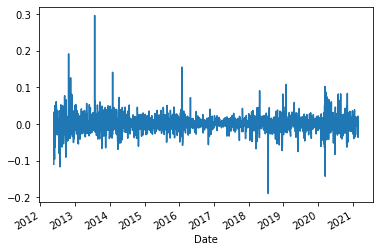

In [4]:
df.FB.plot();

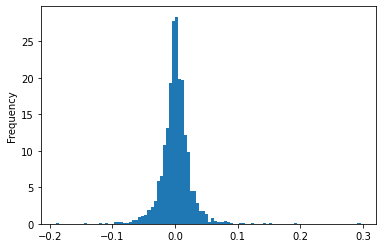

In [5]:
df.FB.plot(kind='hist', bins=100, density=True);

In [6]:
df.describe()

,FB,SPY
count,2207.000000,2207.000000
mean,0.001138,0.000621
std,0.023513,0.010452
min,-0.189609,-0.109424
25%,-0.009251,-0.003108
50%,0.001055,0.000658
75%,0.012086,0.005327
max,0.296115,0.090603


In [7]:
df.mean()

FB     0.001138
SPY    0.000621
dtype: float64

In [8]:
df.std()

FB     0.023513
SPY    0.010452
dtype: float64

array([[1.        , 0.59525861],
       [0.59525861, 1.        ]])

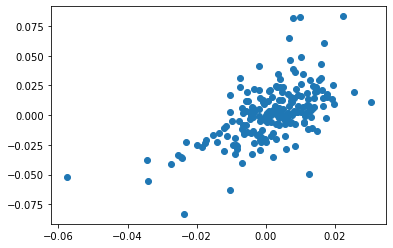

In [9]:
plt.plot(df.SPY[-200:], df.FB[-200:], 'o');
np.corrcoef(df.SPY[-200:], df.FB[-200:])

array([[ 1.        , -0.03133448],
       [-0.03133448,  1.        ]])

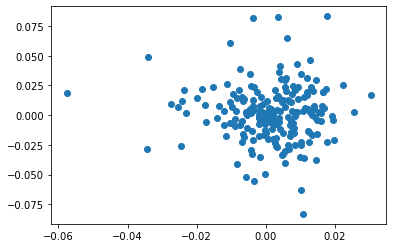

In [10]:
plt.plot(df.SPY[-200:-1], df.FB[-199:], 'o');
np.corrcoef(df.SPY[-200:-1], df.FB[-199:]) 

array([[ 1.        , -0.07231557],
       [-0.07231557,  1.        ]])

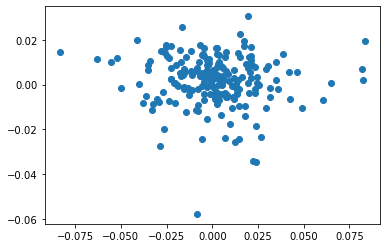

In [11]:
plt.plot(df.FB[-200:-1], df.SPY[-199:], 'o');
np.corrcoef(df.FB[-200:-1], df.SPY[-199:])

array([[ 1.        , -0.12020019],
       [-0.12020019,  1.        ]])

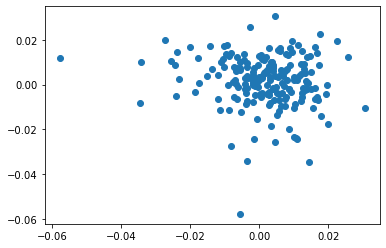

In [12]:
plt.plot(df.SPY[-200:-1], df.SPY[-199:], 'o');
np.corrcoef(df.SPY[-200:-1], df.SPY[-199:])